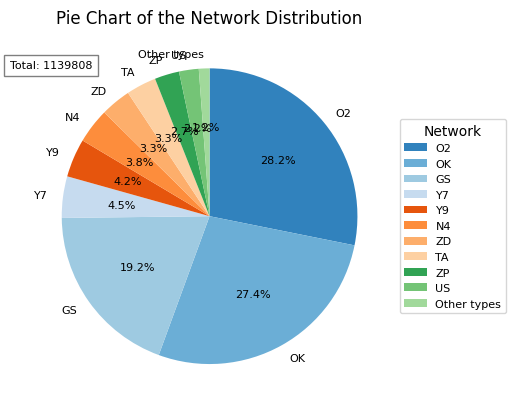

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to the CSV file
file_path = '/Users/hongyuxiao/.seisbench/datasets/okla_1mil_120s_ver_3/metadata.csv'

# Load the CSV file
df = pd.read_csv(file_path)

# Ensure the file has at least 2 columns
if df.shape[1] >= 2:
    # Select the 1st column (index 0 because it's zero-based indexing)
    column_data = df.iloc[:, 0]
    
    # Generate the pie chart data
    counts = column_data.value_counts()
    total = counts.sum()

    # Group entries with less than 2% into "Other types"
    threshold = 0.02 * total
    counts_high = counts[counts >= threshold]
    counts_low = counts[counts < threshold]
    
    if len(counts_low) > 0:
        counts_high['Other types'] = counts_low.sum()
    
    # Define a colormap
    cmap = plt.get_cmap("tab20c")
    colors = cmap(range(len(counts_high)))
    
    # Create the pie chart
    fig, ax = plt.subplots()
    counts_high.plot.pie(
        autopct='%1.1f%%', 
        startangle=90, 
        fontsize=8, 
        counterclock=False, 
        colors=colors, 
        ax=ax
    )
    
    # Set the title
    plt.title('Pie Chart of the Network Distribution')
    plt.ylabel('')  # Hide the y-label
    
    # Add the total number of entries
    total_entries = column_data.count()
    plt.text(-1.35, 1, f'Total: {total_entries}', fontsize=8, bbox=dict(facecolor='white', alpha=0.5))
    
    # Add the legend
    labels = counts_high.index
    ax.legend(labels, title="Network", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=8)
    
    # Save the plot as a PostScript (.ps) file
    #output_file_path = '/Users/hongyuxiao/Hongyu_File/SRL_Manuscript_2024/Figure/Network_Distribution_Pie_Chart.ps'
    #plt.savefig(output_file_path, format='ps', bbox_inches='tight')
    
    #print(f"Plot saved as {output_file_path}")
else:
    print("The CSV file does not have at least 2 columns.")


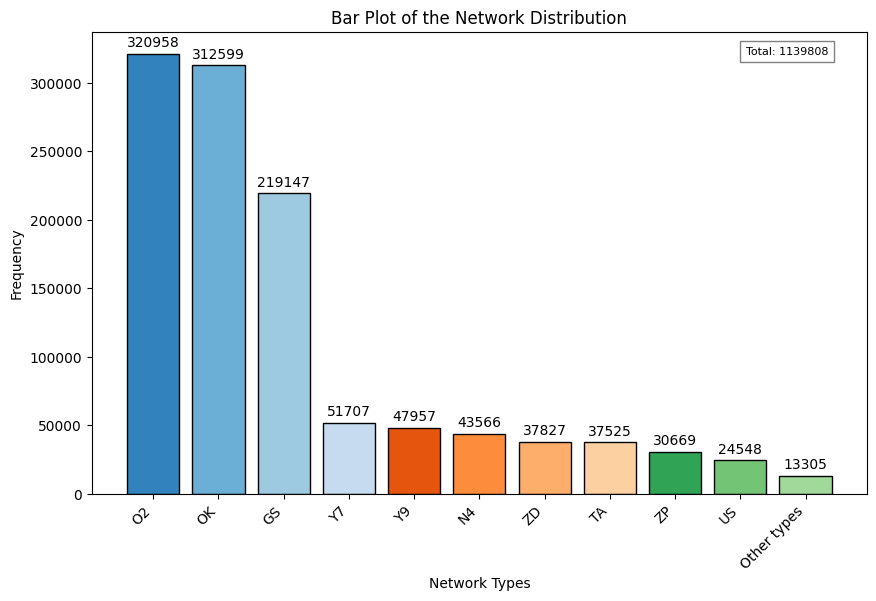

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to the CSV file
file_path = '/Users/hongyuxiao/.seisbench/datasets/okla_1mil_120s_ver_3/metadata.csv'

# Load the CSV file
df = pd.read_csv(file_path)

# Ensure the file has at least 2 columns
if df.shape[1] >= 2:
    # Select the 1st column (index 0 because it's zero-based indexing)
    column_data = df.iloc[:, 0]
    
    # Generate the bar plot data
    counts = column_data.value_counts()
    total = counts.sum()

    # Group entries with less than 2% into "Other types"
    threshold = 0.02 * total
    counts_high = counts[counts >= threshold]
    counts_low = counts[counts < threshold]
    
    if len(counts_low) > 0:
        counts_high['Other types'] = counts_low.sum()
    
    # Define a colormap
    cmap = plt.get_cmap("tab20c")
    colors = cmap(range(len(counts_high)))
    
    # Create the bar plot
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(counts_high.index, counts_high.values, color=colors, edgecolor='black')
    
    # Add count labels on top of the bars
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height), 
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)
    
    # Set the title and labels
    plt.title('Bar Plot of the Network Distribution')
    plt.xlabel('Network Types')
    plt.ylabel('Frequency')
    
    # Add the total number of entries
    total_entries = column_data.count()
    plt.text(0.95, 0.95, f'Total: {total_entries}', fontsize=8, ha='right', transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.5))
    
    # Rotate x labels for better readability
    plt.xticks(rotation=45, ha='right')
    
else:
    print("The CSV file does not have at least 2 columns.")


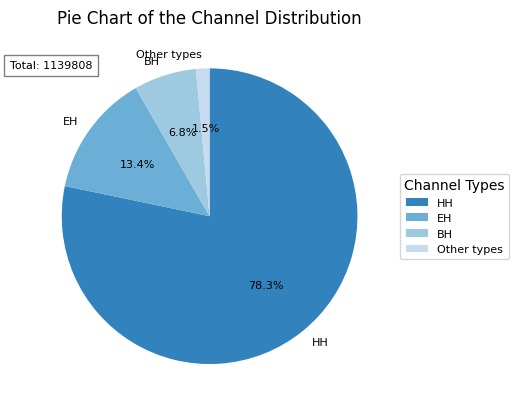

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to the CSV file
file_path = '/Users/hongyuxiao/.seisbench/datasets/okla_1mil_120s_ver_3/metadata.csv'

# Load the CSV file
df = pd.read_csv(file_path)

# Ensure the file has at least 3 columns
if df.shape[1] >= 3:
    # Select the 3rd column (index 2 because it's zero-based indexing)
    column_data = df.iloc[:, 2]
    
    # Group channels by their first two letters
    grouped_data = column_data.str[:2]
    
    # Generate the pie chart data
    counts = grouped_data.value_counts()
    total = counts.sum()
    
    # Group entries with less than 2% into "Other types"
    threshold = 0.02 * total
    counts_high = counts[counts >= threshold]
    counts_low = counts[counts < threshold]
    
    if len(counts_low) > 0:
        counts_high['Other types'] = counts_low.sum()
    
    # Define a colormap
    cmap = plt.get_cmap("tab20c")
    colors = cmap(range(len(counts_high)))
    
    # Create the pie chart
    fig, ax = plt.subplots()
    counts_high.plot.pie(
        autopct='%1.1f%%', 
        startangle=90, 
        fontsize=8, 
        counterclock=False, 
        colors=colors, 
        ax=ax
    )
    
    # Set the title
    plt.title('Pie Chart of the Channel Distribution')
    plt.ylabel('')  # Hide the y-label
    
    # Add the total number of entries
    total_entries = column_data.count()
    plt.text(-1.35, 1, f'Total: {total_entries}', fontsize=8, bbox=dict(facecolor='white', alpha=0.5))
    
    # Add the legend
    labels = counts_high.index
    ax.legend(labels, title="Channel Types", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=8)
    
else:
    print("The CSV file does not have at least 3 columns.")


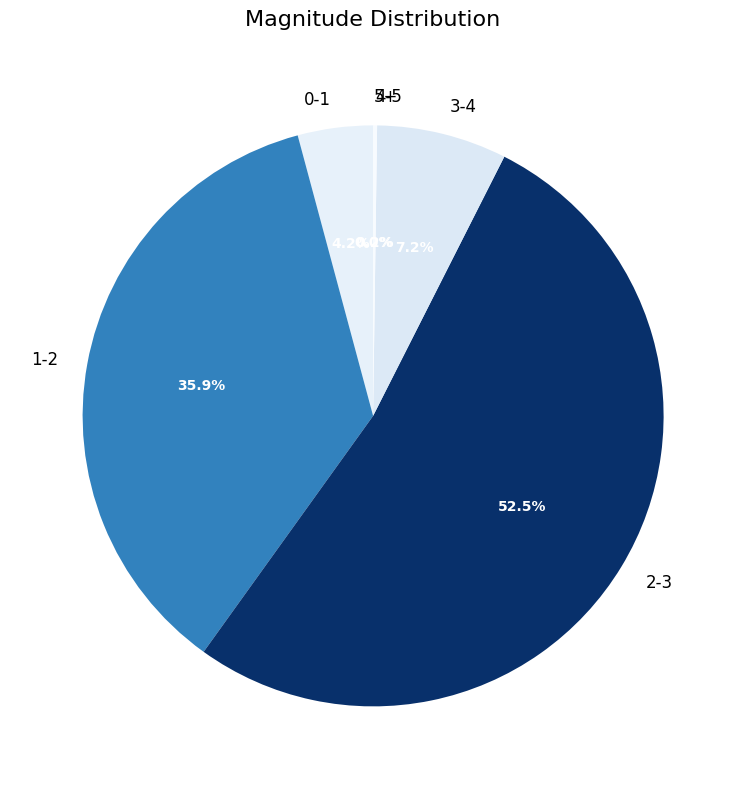

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import Blues
from matplotlib.colors import Normalize

# Define the path to the CSV file
file_path = '/Users/hongyuxiao/.seisbench/datasets/okla_1mil_120s_ver_3/metadata.csv'

# Load the CSV file
df = pd.read_csv(file_path)

# Ensure the file has the required column
if "source_magnitude" in df.columns:
    # Extract magnitude data
    column_data = df["source_magnitude"]
    
    # Categorize magnitudes into bins (anything 5.0+ grouped together)
    bins = [0, 1, 2, 3, 4, 5, column_data.max()]
    labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5+']
    df['magnitude_bin'] = pd.cut(column_data, bins=bins, labels=labels, include_lowest=True)
    
    # Count the number of events in each bin
    magnitude_counts = df['magnitude_bin'].value_counts().sort_index()
    
    # Normalize counts for the color scheme
    norm = Normalize(vmin=magnitude_counts.min(), vmax=magnitude_counts.max())
    
    # Generate the color scheme using Blues colormap
    colors = [Blues(norm(count)) for count in magnitude_counts]
    
    # Create the pie chart
    plt.figure(figsize=(8, 8))
    wedges, texts, autotexts = plt.pie(
        magnitude_counts,
        labels=magnitude_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        textprops={'fontsize': 12}
    )
    
    # Style the pie chart
    plt.setp(autotexts, size=10, weight="bold", color="white")
    plt.title('Magnitude Distribution', fontsize=16, pad=20)
    plt.tight_layout()
    # Show the plot
    plt.show()
else:
    print("The required 'source_magnitude' column is not present in the CSV file.")


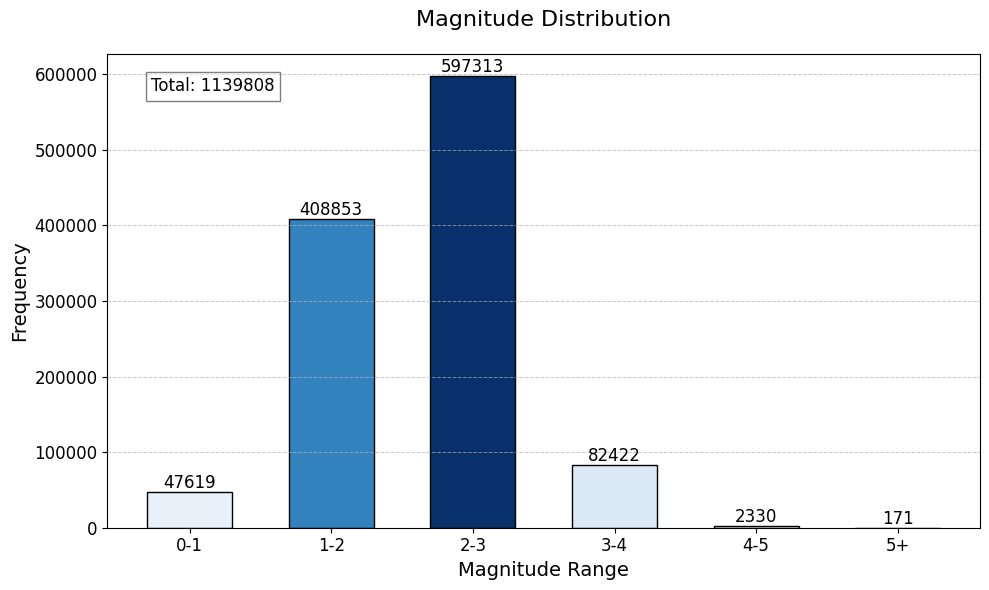

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import Blues
from matplotlib.colors import Normalize

# Define the path to the CSV file
file_path = '/Users/hongyuxiao/.seisbench/datasets/okla_1mil_120s_ver_3/metadata.csv'

# Load the CSV file
df = pd.read_csv(file_path)

# Ensure the file has the required column
if "source_magnitude" in df.columns:
    # Extract magnitude data
    column_data = df["source_magnitude"]
    
    # Categorize magnitudes into bins (anything 5.0+ grouped together)
    bins = [0, 1, 2, 3, 4, 5, column_data.max()]
    labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5+']
    df['magnitude_bin'] = pd.cut(column_data, bins=bins, labels=labels, include_lowest=True)
    
    # Count the number of events in each bin
    magnitude_counts = df['magnitude_bin'].value_counts().sort_index()
    
    # Normalize counts for the color scheme
    norm = Normalize(vmin=magnitude_counts.min(), vmax=magnitude_counts.max())
    
    # Generate the color scheme using Blues colormap
    colors = [Blues(norm(count)) for count in magnitude_counts]
    
    # Create the bar chart
    plt.figure(figsize=(10, 6))
    bars = plt.bar(
        magnitude_counts.index,
        magnitude_counts.values,
        color=colors,
        edgecolor='black',
        width=0.6
    )
    
    # Add annotations for each bar
    for bar, count in zip(bars, magnitude_counts):
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            str(count),
            ha='center',
            va='bottom',
            fontsize=12
        )
    
    # Add text annotation for the total number of entries
    total_entries = column_data.count()
    plt.text(
        0.05, 0.95, f'Total: {total_entries}', transform=plt.gca().transAxes,
        fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5)
    )
    
    # Set title and labels
    plt.title('Magnitude Distribution', fontsize=16, pad=20)
    plt.xlabel('Magnitude Range', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Add a grid for better readability
    plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
    
    
    # Adjust layout and display the plot
    plt.tight_layout()

    plt.show()
else:
    print("The required 'source_magnitude' column is not present in the CSV file.")


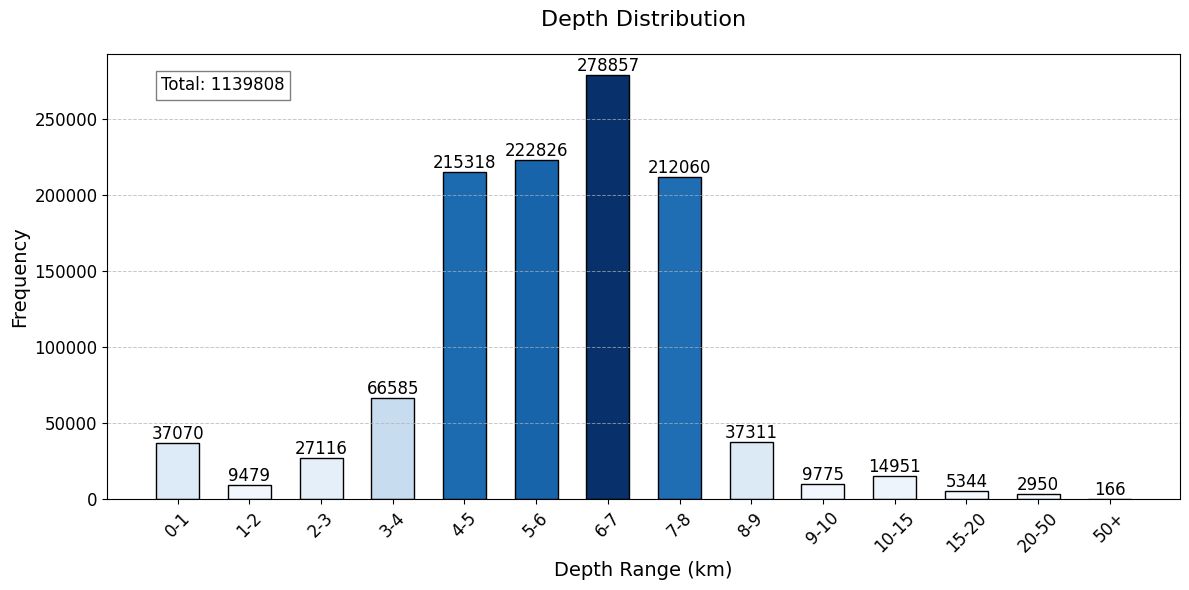

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import Blues
from matplotlib.colors import Normalize

# Define the path to the CSV file
file_path = '/Users/hongyuxiao/.seisbench/datasets/okla_1mil_120s_ver_3/metadata.csv'

# Load the CSV file
df = pd.read_csv(file_path)

# Ensure the file has the required column
if "source_depth_km" in df.columns:
    # Extract depth data
    depth_data = df["source_depth_km"]
    
    # Define the custom bins
    bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 50, depth_data.max()]
    labels = [
        '0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10',
        '10-15', '15-20', '20-50', '50+'
    ]
    
    # Categorize depths into bins
    df['depth_bin'] = pd.cut(depth_data, bins=bins, labels=labels, include_lowest=True)
    
    # Count the number of events in each bin
    depth_counts = df['depth_bin'].value_counts().sort_index()
    
    # Normalize counts for the color scheme
    norm = Normalize(vmin=depth_counts.min(), vmax=depth_counts.max())
    
    # Generate the color scheme using Blues colormap
    colors = [Blues(norm(count)) for count in depth_counts]
    
    # Create the bar chart
    plt.figure(figsize=(12, 6))
    bars = plt.bar(
        depth_counts.index.astype(str),  # Convert labels to string for better formatting
        depth_counts.values,
        color=colors,
        edgecolor='black',
        width=0.6
    )
    
    # Add annotations for each bar
    for bar, count in zip(bars, depth_counts):
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            str(count),
            ha='center',
            va='bottom',
            fontsize=12
        )
    
    # Add text annotation for the total number of entries
    total_entries = depth_data.count()
    plt.text(
        0.05, 0.95, f'Total: {total_entries}', transform=plt.gca().transAxes,
        fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5)
    )
    
    # Set title and labels
    plt.title('Depth Distribution', fontsize=16, pad=20)
    plt.xlabel('Depth Range (km)', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    
    # Add a grid for better readability
    plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
    
    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()
else:
    print("The required 'source_depth_km' column is not present in the CSV file.")


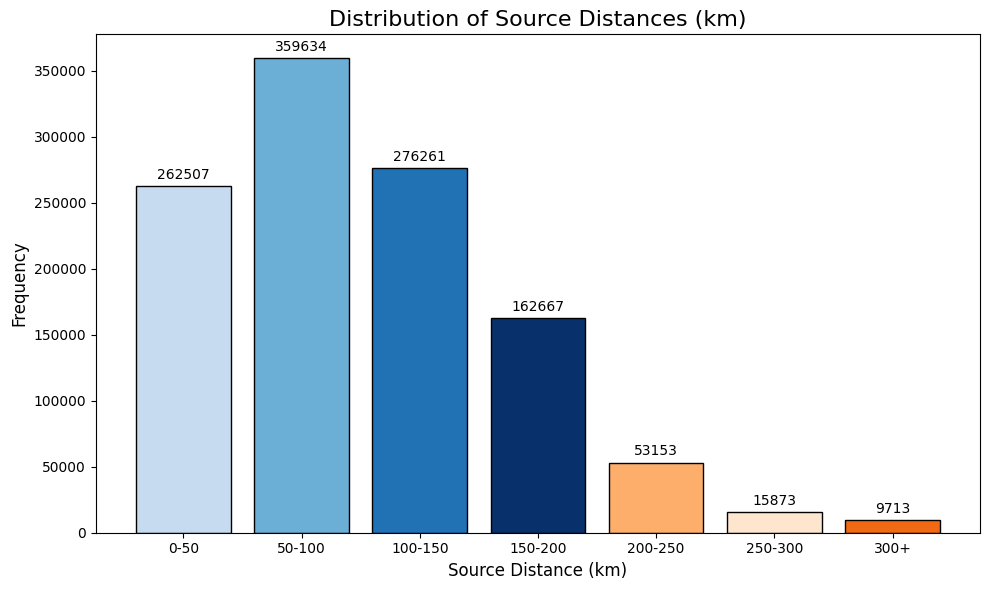

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the path to the CSV file
file_path = '/Users/hongyuxiao/.seisbench/datasets/okla_1mil_120s_ver_3/metadata.csv'

# Load the CSV file
df = pd.read_csv(file_path)

# Ensure the file has the required column
if "source_distance_km" in df.columns:
    # Extract distance data
    distance_data = df["source_distance_km"]
    
    # Define the custom bins for distance, grouping anything larger than 300 km together
    bins = [0, 50, 100, 150, 200, 250, 300, distance_data.max()]
    labels = ['0-50', '50-100', '100-150', '150-200', '200-250', '250-300', '300+']
    
    # Categorize distances into bins
    df['distance_bin'] = pd.cut(distance_data, bins=bins, labels=labels, include_lowest=True)
    
    # Count the number of events in each bin
    distance_counts = df['distance_bin'].value_counts().sort_index()
    
    # Define the custom color scheme
    colors = [
        '#c6dbef', '#6baed6', '#2171b5', '#08306b', '#fdae6b',
        '#fee6ce', '#f16913', '#d94801', '#a63603', '#7f2704'
    ]
    
    # Extend the color scheme if needed
    colors = colors[:len(distance_counts)] if len(distance_counts) <= len(colors) else colors + ['#08306b'] * (len(distance_counts) - len(colors))
    
    # Create the bar chart
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(distance_counts.index, distance_counts.values, color=colors, edgecolor='black')
    
    # Add count labels on top of the bars
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height), 
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)
    
    # Set the title and labels
    plt.title('Distribution of Source Distances (km)', fontsize=16)
    plt.xlabel('Source Distance (km)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    
    # Display the plot
    plt.tight_layout()
    plt.show()
else:
    print("The required 'source_distance_km' column is not present in the CSV file.")


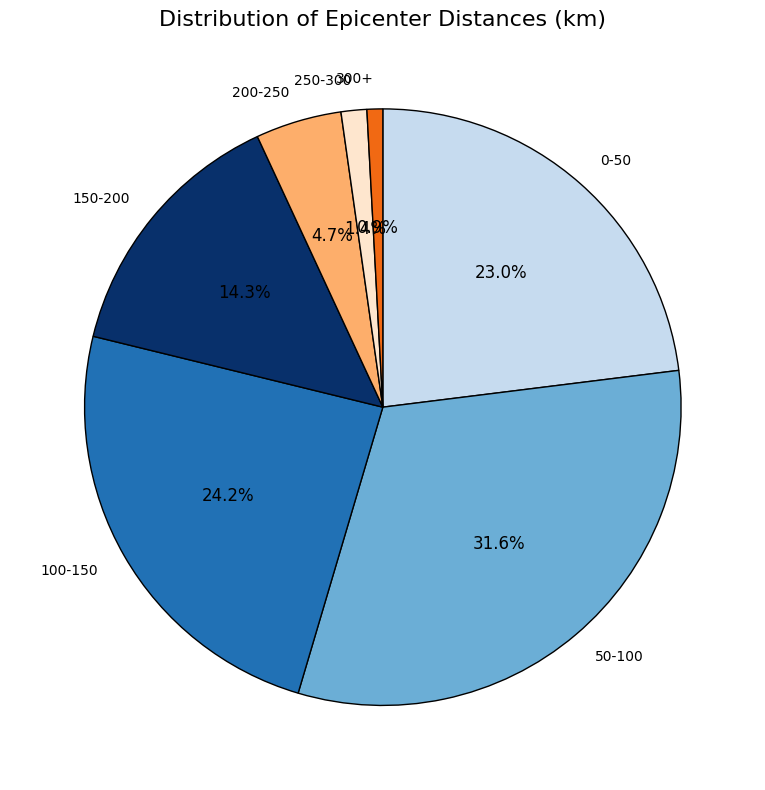

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the path to the CSV file
file_path = '/Users/hongyuxiao/.seisbench/datasets/okla_1mil_120s_ver_3/metadata.csv'

# Load the CSV file
df = pd.read_csv(file_path)

# Ensure the file has the required column
if "source_distance_km" in df.columns:
    # Extract distance data
    distance_data = df["source_distance_km"]
    
    # Define the custom bins for distance, grouping anything larger than 300 km together
    bins = [0, 50, 100, 150, 200, 250, 300, distance_data.max()]
    labels = ['0-50', '50-100', '100-150', '150-200', '200-250', '250-300', '300+']
    
    # Categorize distances into bins
    df['distance_bin'] = pd.cut(distance_data, bins=bins, labels=labels, include_lowest=True)
    
    # Count the number of events in each bin
    distance_counts = df['distance_bin'].value_counts().sort_index()
    
    # Define the custom color scheme
    colors = [
        '#c6dbef', '#6baed6', '#2171b5', '#08306b', '#fdae6b',
        '#fee6ce', '#f16913', '#d94801', '#a63603', '#7f2704'
    ]
    
    # Extend the color scheme if needed
    colors = colors[:len(distance_counts)] if len(distance_counts) <= len(colors) else colors + ['#08306b'] * (len(distance_counts) - len(colors))
    
    # Create the pie chart
    fig, ax = plt.subplots(figsize=(8, 8))
    wedges, texts, autotexts = ax.pie(distance_counts.values, 
                                      labels=distance_counts.index, 
                                      autopct='%1.1f%%', 
                                      startangle=90, 
                                      counterclock=False,
                                      colors=colors, 
                                      wedgeprops={'edgecolor': 'black'})

    # Add percentage text outside the pie
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontsize(12)
    
    # Set the title
    plt.title('Distribution of Epicenter Distances (km)', fontsize=16)
    
    # Display the plot
    plt.tight_layout()
    plt.show()
else:
    print("The required 'source_distance_km' column is not present in the CSV file.")


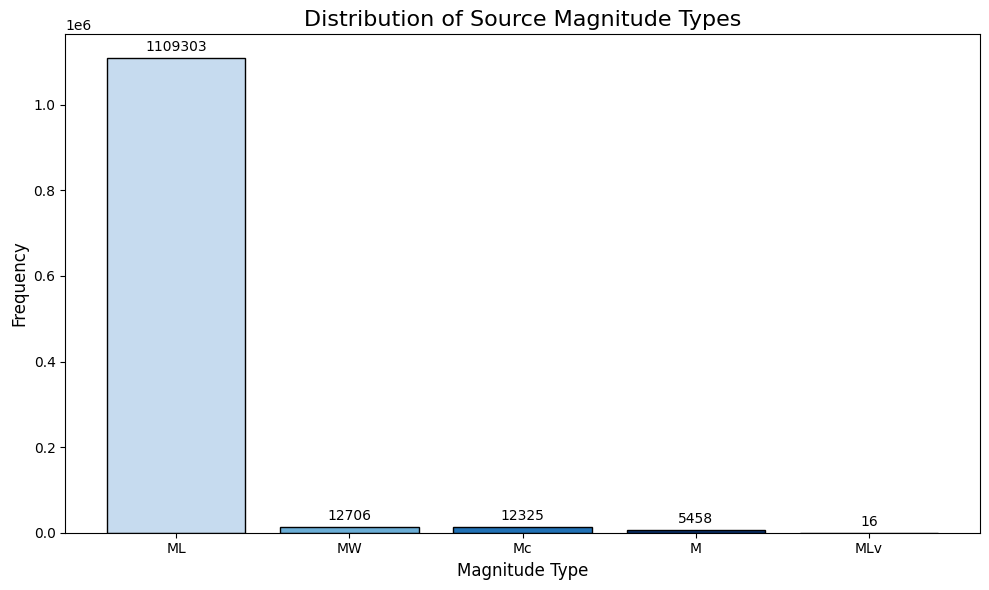

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the path to the CSV file
file_path = '/Users/hongyuxiao/.seisbench/datasets/okla_1mil_120s_ver_3/metadata.csv'

# Load the CSV file
df = pd.read_csv(file_path)

# Ensure the file has the required column
if "source_magnitude_type" in df.columns:
    # Count the number of occurrences of each magnitude type
    magnitude_counts = df['source_magnitude_type'].value_counts()
    
    # Define the custom color scheme
    colors = [
        '#c6dbef', '#6baed6', '#2171b5', '#08306b', '#fdae6b',
        '#fee6ce', '#f16913', '#d94801', '#a63603', '#7f2704'
    ]
    
    # Extend the color scheme if needed
    colors = colors[:len(magnitude_counts)] if len(magnitude_counts) <= len(colors) else colors + ['#08306b'] * (len(magnitude_counts) - len(colors))
    
    # Create the bar chart
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(magnitude_counts.index, magnitude_counts.values, color=colors, edgecolor='black')
    
    # Add count labels on top of the bars
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height), 
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)
    
    # Set the title and labels
    plt.title('Distribution of Source Magnitude Types', fontsize=16)
    plt.xlabel('Magnitude Type', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    
    # Display the plot
    plt.tight_layout()
    plt.show()
else:
    print("The required 'source_magnitude_type' column is not present in the CSV file.")


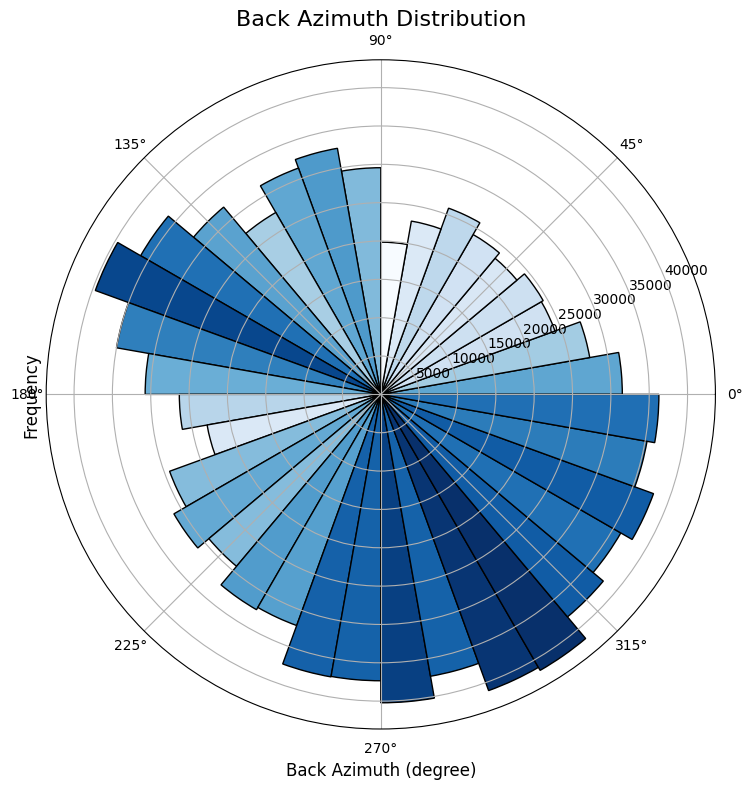

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Define the path to the CSV file
file_path = '/Users/hongyuxiao/.seisbench/datasets/okla_1mil_120s_ver_3/metadata.csv'

# Load the CSV file
df = pd.read_csv(file_path)

# Ensure the file has the required column
if "path_back_azimuth_deg" in df.columns:
    # Extract back azimuth data
    azimuth_data = df['path_back_azimuth_deg']
    
    # Define the number of bins for the azimuth range (360 degrees)
    num_bins = 36  # 10-degree bins
    
    # Calculate histogram data (counts of azimuths in each bin)
    counts, bin_edges = np.histogram(azimuth_data, bins=num_bins, range=(0, 360))
    
    # Calculate the bin centers for plotting
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Create a colormap (a gradient from light blue to dark blue)
    cmap = plt.get_cmap("Blues")
    
    # Normalize the counts to the range [0, 1] for color mapping
    norm = plt.Normalize(vmin=min(counts), vmax=max(counts))
    
    # Create the rose plot (polar plot)
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
    
    # Plot the azimuth histogram using bars in polar coordinates with a gradient color
    bars = ax.bar(np.radians(bin_centers), counts, width=np.radians(10), color=cmap(norm(counts)), edgecolor='black', align='center')
    
    # Set the title and labels
    ax.set_title('Back Azimuth Distribution', fontsize=16)
    ax.set_xlabel('Back Azimuth (degree)', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    
    # Display the plot
    plt.tight_layout()
    plt.show()
else:
    print("The required 'path_back_azimuth_deg' column is not present in the CSV file.")


/var/folders/sd/gqkj0t9n16n8_qtbhd_wlhp80000gq/T/ipykernel_35300/1389881431.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = df.groupby(['Year', 'Month']).size().reset_index(name='Count')


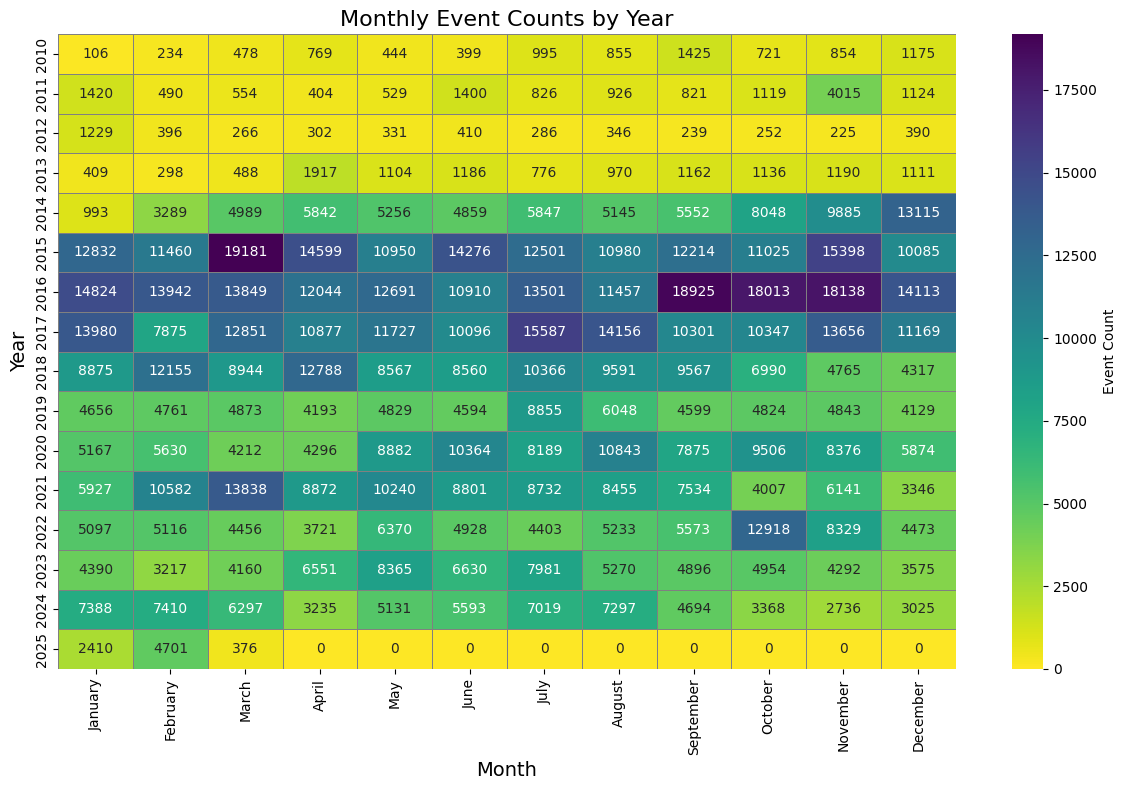

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

# Define the path to the CSV file
file_path = '/Users/hongyuxiao/.seisbench/datasets/okla_1mil_120s_ver_3/metadata.csv'

# Read the CSV file
df = pd.read_csv(file_path)

# Extract the date part before "T"
df['Date'] = pd.to_datetime(df['source_origin_time'].str.split('T').str[0])

# Extract year and month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()

# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Convert 'Month' column to categorical with the defined order
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

# Group by year and month and count the occurrences
heatmap_data = df.groupby(['Year', 'Month']).size().reset_index(name='Count')

# Pivot the data to create a matrix with years as rows and months as columns
heatmap_matrix = heatmap_data.pivot(index='Year', columns='Month', values='Count')

# Create the heatmap
plt.figure(figsize=(12, 8))
cmap = plt.get_cmap('viridis_r')  # Use the reversed colormap 'viridis_r'
sns.heatmap(heatmap_matrix, cmap=cmap, annot=True, fmt='.0f', linewidths=0.5, linecolor='gray', cbar_kws={'label': 'Event Count'})
plt.title('Monthly Event Counts by Year', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Year', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Display the plot
plt.show()
